# Working with Data APIs

**Adapted from: Sam Maurer // maurer@berkeley.edu // Oct. 3, 2016**

This notebook provides a demonstration of data-access APIs that operate over the web. See README.md for setup instructions.

In Part 1, we'll load and parse results from an API feed of earthquake data.  
In Part 2, we'll add query parameters to the workflow, using the Google Maps Geolocation API as an example.  
In Part 3, we'll use an authenticated API to query public Twitter posts. 

# Part 1: Reading from an automated data feed

### USGS real-time earthquake feeds

This is an API for near-real-time data about earthquakes. Data is provided in JSON format over the web. No authentication is needed, and there's no way to customize the output. Instead, the API has a separate endpoint for each permutation of the data that users might want.

**API documentation:**  
http://earthquake.usgs.gov/earthquakes/feed/v1.0/geojson.php

**Sample API endpoint, for magnitude 4.5+ earthquakes in past day:**  
http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_day.geojson  


In [1]:
%matplotlib inline

import pandas as pd

import json    # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [2]:
# download data on magnitude 2.5+ quakes from the past week

endpoint_url = "http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson"
response = requests.get(endpoint_url)
results = response.text

# what is the data type of the results?
print(type(results))

<class 'str'>


In [3]:
type (response)

requests.models.Response

In [9]:
print (response)

<Response [200]>


In [4]:
response.

SyntaxError: invalid syntax (<ipython-input-4-d3a67accd037>, line 1)

In [5]:
# print the first 500 characters to see a sample of the data

print(results[:500])

{"type":"FeatureCollection","metadata":{"generated":1552016328000,"url":"https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson","title":"USGS Magnitude 2.5+ Earthquakes, Past Week","status":200,"api":"1.7.0","count":287},"features":[{"type":"Feature","properties":{"mag":4.4,"place":"159km NE of Yelizovo, Russia","time":1552013240930,"updated":1552015021040,"tz":720,"url":"https://earthquake.usgs.gov/earthquakes/eventpage/us1000jc89","detail":"https://earthquake.usgs.gov/eart


In [6]:
# it looks like the results are a string with JSON-formatted data inside

# parse the string into a Python dictionary
data = json.loads(results)

print(type(data))

<class 'dict'>


In [7]:
# print the most recent quake

quakes = data['features']
print(quakes[0])

{'type': 'Feature', 'properties': {'mag': 4.4, 'place': '159km NE of Yelizovo, Russia', 'time': 1552013240930, 'updated': 1552015021040, 'tz': 720, 'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/us1000jc89', 'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/us1000jc89.geojson', 'felt': None, 'cdi': None, 'mmi': None, 'alert': None, 'status': 'reviewed', 'tsunami': 0, 'sig': 298, 'net': 'us', 'code': '1000jc89', 'ids': ',us1000jc89,', 'sources': ',us,', 'types': ',geoserve,origin,phase-data,', 'nst': None, 'dmin': 1.495, 'rms': 0.67, 'gap': 116, 'magType': 'mb', 'type': 'earthquake', 'title': 'M 4.4 - 159km NE of Yelizovo, Russia'}, 'geometry': {'type': 'Point', 'coordinates': [159.7582, 54.363, 107.82]}, 'id': 'us1000jc89'}


In [8]:
# print it more clearly

pp.pprint(quakes[0]['geometry'])
pp.pprint(quakes[0]['properties'])

{'coordinates': [159.7582, 54.363, 107.82], 'type': 'Point'}
{'alert': None,
 'cdi': None,
 'code': '1000jc89',
 'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/us1000jc89.geojson',
 'dmin': 1.495,
 'felt': None,
 'gap': 116,
 'ids': ',us1000jc89,',
 'mag': 4.4,
 'magType': 'mb',
 'mmi': None,
 'net': 'us',
 'nst': None,
 'place': '159km NE of Yelizovo, Russia',
 'rms': 0.67,
 'sig': 298,
 'sources': ',us,',
 'status': 'reviewed',
 'time': 1552013240930,
 'title': 'M 4.4 - 159km NE of Yelizovo, Russia',
 'tsunami': 0,
 'type': 'earthquake',
 'types': ',geoserve,origin,phase-data,',
 'tz': 720,
 'updated': 1552015021040,
 'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/us1000jc89'}


In [10]:
# pull out the title from each earthquake listing

for q in quakes:
    print(q['properties']['title'])

M 4.4 - 159km NE of Yelizovo, Russia
M 5.4 - 43km SE of Taitung City, Taiwan
M 4.3 - 46km SW of La Gomera, Guatemala
M 3.2 - 34km WNW of Anaktuvuk Pass, Alaska
M 2.7 - 8km WNW of Knik-Fairview, Alaska
M 3.3 - 72km SSW of Kobuk, Alaska
M 4.6 - 42km WNW of Abepura, Indonesia
M 4.8 - 88km E of King Salmon, Alaska
M 2.8 - 237km SE of Kodiak, Alaska
M 3.5 - 97km N of Road Town, British Virgin Islands
M 3.0 - 50km NNE of Punta Cana, Dominican Republic
M 4.9 - Kuril Islands
M 4.4 - 15km ESE of Dedang, China
M 2.5 - 69km SSW of Kaktovik, Alaska
M 2.9 - 68km SSW of Kobuk, Alaska
M 4.7 - 90km W of False Pass, Alaska
M 5.7 - 134km SSE of L'Esperance Rock, New Zealand
M 3.3 - 74km S of Kobuk, Alaska
M 3.0 - 23km SSW of Beaver, Utah
M 5.7 - 138km WNW of Coquimbo, Chile
M 5.5 - 252km SE of L'Esperance Rock, New Zealand
M 3.2 - 31km NNE of Road Town, British Virgin Islands
M 2.8 - 4km E of Blanchard, Oklahoma
M 2.7 - 33km SW of Hayfork, CA
M 4.9 - 118km SE of L'Esperance Rock, New Zealand
M 2.7 - 10k

In [11]:
# pull out magnitudes and depths into a Pandas dataframe, using
# a more compact Python syntax for iterating through lists

d = {'magnitude': [q['properties']['mag'] for q in quakes],
     'depth': [q['geometry']['coordinates'][2] for q in quakes]}

df = pd.DataFrame.from_dict(d)

# how many earthquakes were loaded into the dataframe?
print(len(df))

287


In [12]:
# print the first few lines of data

print(df.head())

   magnitude   depth
0        4.4  107.82
1        5.4   10.00
2        4.3   10.00
3        3.2   15.00
4        2.7   20.30


In [13]:
# print some descriptive statistics

print(df.describe())

        magnitude       depth
count  287.000000  287.000000
mean     3.714251   42.385889
std      1.014688   70.627156
min      2.450000   -0.450000
25%      2.800000   10.000000
50%      3.350000   15.900000
75%      4.600000   48.000000
max      7.000000  558.630000


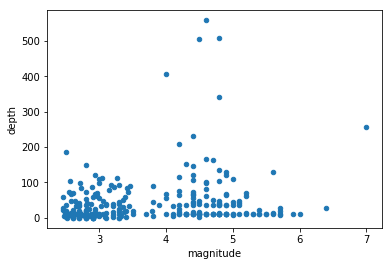

In [14]:
# plot the depth vs. magnitude

df.plot(x='magnitude', y='depth', kind='scatter')

In [15]:
# save the dataframe to disk

df.to_csv('usgs_earthquake_data.csv')

print('file saved')

file saved


In [16]:
# read it back later

new_df = pd.DataFrame.from_csv('usgs_earthquake_data.csv')

print(new_df.head())

   magnitude   depth
0        4.4  107.82
1        5.4   10.00
2        4.3   10.00
3        3.2   15.00
4        2.7   20.30


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  This is separate from the ipykernel package so we can avoid doing imports until


# Part 2: Querying an API endpoint

### Google Maps Geocoding API

Google has lots of APIs that let you access its services through code instead of through GUI apps. This one from Google Maps lets you look up the latitude-longitude coordinates of street addresses.

It works similarly to the earthquakes example, but with query parameters added to the URL endpoint!

**API documentation:**  
https://developers.google.com/maps/documentation/geocoding/intro

**API endpoint:**  
https://maps.googleapis.com/maps/api/geocode/json

**API endpoint with query parameters:**  
https://maps.googleapis.com/maps/api/geocode/json?address=Wurster+Hall

In [17]:
import json    # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [18]:
# we have to encode the search query so that it can be passed as a URL, 
# with spaces and other special characters removed

endpoint = 'https://maps.googleapis.com/maps/api/geocode/json'

params = {'address': 'young library uky'}

url = requests.Request('GET', endpoint, params=params).prepare().url
print(url)

https://maps.googleapis.com/maps/api/geocode/json?address=young+library+uky


In [19]:
# download and parse the results

response = requests.get(url)
results = response.text
data = json.loads(results)

print(data)

{'error_message': 'You must use an API key to authenticate each request to Google Maps Platform APIs. For additional information, please refer to http://g.co/dev/maps-no-account', 'results': [], 'status': 'REQUEST_DENIED'}


In [20]:
# print it more nicely

pp.pprint(data)

{'error_message': 'You must use an API key to authenticate each request to '
                  'Google Maps Platform APIs. For additional information, '
                  'please refer to http://g.co/dev/maps-no-account',
 'results': [],
 'status': 'REQUEST_DENIED'}


In [24]:
# pull out the lat-lon coordinates

for r in data['results']:
    coords = r['geometry']['location']
    print(coords['lat'], coords['lng'])

### Exercises

1. Search for some other addresses or landmarks!
2. Take a look at the [API documentation](https://developers.google.com/maps/documentation/geocoding/intro). What are the usage limits?

# Part 3: Querying an API with authentication

### Twitter REST APIs

Twitter's APIs also operate over the web, but they require a back-and-forth authentication process at the beginning of each connection. It's easier to have a Python library handle this than to create the query URLs ourselves.

The Twitter "REST" APIs perform stand-alone operations: you submit a query and receive results, like in earlier examples. ([REST](https://en.wikipedia.org/wiki/Representational_state_transfer) is a particular set of guidelines that many APIs follow.) Twitter also has a "streaming" API that continues sending results in real time until you disconnect.

**API documentation:**  
https://dev.twitter.com/rest/public  
https://dev.twitter.com/overview/api/tweets

**Documentation for the Python helper library**:  
https://github.com/geduldig/TwitterAPI

In [29]:
from TwitterAPI import TwitterAPI

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [30]:
# import API credentials from keys.py file in the
# same directory as this notebook

from keys import *

In [31]:
# set up an API connection using credentials from the keys file

api = TwitterAPI(consumer_key, consumer_secret, 
                 access_token, access_token_secret)

print("Connection is set up but not tested")

Connection is set up but not tested


### Making a simple data request

In [32]:
# most recent tweet from @UCBerkeley's timeline

endpoint = 'statuses/user_timeline'
params = {
    'screen_name': 'UKAthletics', 
    'count': 1
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'])

RT @KentuckyMBB: "You either lose or you're lucky to get out of alive."

That was what faced in the latest stop on #TheJourney. 

We got ou…


In [33]:
# what other data is there?

pp.pprint(tweet)

{'contributors': None,
 'coordinates': None,
 'created_at': 'Fri Mar 08 00:49:58 +0000 2019',
 'entities': {'hashtags': [{'indices': [115, 126], 'text': 'TheJourney'}],
              'symbols': [],
              'urls': [],
              'user_mentions': [{'id': 35583547,
                                 'id_str': '35583547',
                                 'indices': [3, 15],
                                 'name': 'Kentucky Basketball',
                                 'screen_name': 'KentuckyMBB'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 1103820115546644482,
 'id_str': '1103820115546644482',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'retweet_count': 138,
 'retweeted': False,
 'retweeted_status': {'contributors': None,
                      'coordinates': None,
               

### Other API endpoints allow different types of searches

In [34]:
# search for public tweets about #BBN

endpoint = 'search/tweets'
params = {
    'q': '#BBN', 
    'count': 5
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

Nerlens and Kanter going at it. Cat on Cat crime. #OKCvsPOR #BBN #NBATwitter

RT @CameronThreatt: Blessed to receive an offer from The University Of Kentucky #BBN🔵⚪️ https://t.co/lM25fLA9Cy

RT @MetzCamfield: Just noticed Mizzou creeped into the top 75 of the NET rankings. That means @KentuckyMBB now currently has the most Q1 vi…

RT @tjdadonn: blessed to receive an offer from the University of Kentucky! #BBN https://t.co/1Z2hcAc7aC

RT @Kentucky_Hockey: 🔵⚪️⚫️#BBN⚫️⚪️🔵

Another one? Yuuuuup!

BBN! Here is another commitment, Colby Couture, @ColbyCouture9. 

At 5’10, 220l…



In [38]:
# search for public tweets in Hindi

endpoint = 'search/tweets'
params = {
    'q': '*', 
    'lang': 'bengali', 
    'count': 5
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

RT @AITCofficial: Yuvashree 2 Arpan: Giving a new direction to Bangla’s youth

‘যুবশ্রী ২ অর্পণ’ - যুবক-যুবতীদের স্বনির্ভর করার লক্ষ্যে নতু…

RT @AITCofficial: Yuvashree 2 Arpan: Giving a new direction to Bangla’s youth

‘যুবশ্রী ২ অর্পণ’ - যুবক-যুবতীদের স্বনির্ভর করার লক্ষ্যে নতু…

RT @AITCofficial: Yuvashree 2 Arpan: Giving a new direction to Bangla’s youth

‘যুবশ্রী ২ অর্পণ’ - যুবক-যুবতীদের স্বনির্ভর করার লক্ষ্যে নতু…

RT @AITCofficial: Yuvashree 2 Arpan: Giving a new direction to Bangla’s youth

‘যুবশ্রী ২ অর্পণ’ - যুবক-যুবতীদের স্বনির্ভর করার লক্ষ্যে নতু…

RT @AITCofficial: Yuvashree 2 Arpan: Giving a new direction to Bangla’s youth

‘যুবশ্রী ২ অর্পণ’ - যুবক-যুবতীদের স্বনির্ভর করার লক্ষ্যে নতু…



In [39]:
# search for public tweets geotagged near the UK campus

endpoint = 'search/tweets'
params = {
    'q': '*', 
    'geocode': '38.034,-84.500,0.5km', 
    'count': 10
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

@ColeBoyle3 hey lil buddy.... why ya hiding over there??? https://t.co/BwOBqgVenZ

I would like to scream

Students Make the Best Teachers! New BLOG! Students Make the Best Teachers  https://t.co/h4fau911BK

I hope Dr. Everett McCorvey sings the national anthem Saturday at Rupp Arena. He would be perfect for UK Senior Day… https://t.co/4TVMbwQBS0

Madama Butterfly 🦋
#Opera #GNO @ Singletary Center for the Arts https://t.co/XgxZUlBBB5

hbd justin bieber ( michael_rutherford_ ) hope you have the worst day ever cause you deserve it 🥴 swipe for a surpr… https://t.co/cKupMId15q

.@universityofky can you please turn on the heat in the graduate student study? It's hard to write dissertations wi… https://t.co/bzFJSE26lc



### Exercises

1. Try some different search queries!
2. Display some more data fields in addition to the tweet text

## Answer 1

### 1. Tweets from "The Avengers" (Language: English)

In [42]:
endpoint = 'search/tweets'
params = {
    'q': 'The Avengers',
    'lang': 'en', 
    'count': 5
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

Game of Thrones and Avengers: Endgame after they both take over the month of April https://t.co/pvJEJ8skMS

@zyxeol IS IT NOT UNFAIR??! WHEN HE LEFT THE AVENGERS HE WAS STUCK WITH NATASHA, WHAT KIND OF FREEDOM IS THAT??!!!!

we saw how Fury loses his eye, where the name 'Avengers' came from, how Paulsen came to be, and how the tessaract came into Shield's hands

RT @ghostofthor: carol: can u get me some water

the avengers: we’re the avengers 

carol: ok the avengers can u get me some water



###  2. Tweets from "Game of Thrones" (Language: English)

In [43]:
endpoint = 'search/tweets'
params = {
    'q': 'Game of Thrones',
    'lang': 'en', 
    'count': 5
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

RT @frankpallotta: HBO has put together a whole GAME OF THRONES blood drive event at #SXSW called “Bleed for the Throne” in partnership wit…

if you pass the game of thrones intro.........electric chair

I wish I started watching Game of Thrones sooner, lol

RT @cinelinx: ICYMI: The first real #GameOfThrones Season 8 trailer has arrived. https://t.co/F3hHvkfu5d https://t.co/2w3r6qqhZo

RT @kuntgaroo: I think im that 1% that hasn't watched game of thrones yet



### 3. Tweets from "Bangladesh Cricket" (Language: Bengali)

In [44]:
endpoint = 'search/tweets'
params = {
    'q': 'Bangladesh Cricket',
    'lang': 'bn', 
    'count': 5
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

বাংলাদেশের ক্রিকেটারদের অবিস্মরণীয় ৭টি পারফর্মেন্স | Bangladesh Cricket | DhumroJal | ধুম্রজাল https://t.co/ueVWnJdjgU

মুশফিককে ছাড়াই মাঠে নামছে বাংলাদেশ... https://t.co/5JEDqiG3gs

প্রথমেই অস্ট্রেলিয়া, দ্বিতীয় ভারত, দশে বাংলাদেশ... https://t.co/GmmhizBrr1

নিউজিল্যান্ডের কাছে হার মেনেছে বাংলাদেশের বোলাররা – Bangladesh Cricket News https://t.co/9kM8nDtYTg https://t.co/AUVvKVhLta

আশা করা হয়েছিলো দ্বিতীয় টেস্টে মুশিকে পাওয়া যাবে তবে শেষ মূহুর্তে এসে আশাহত। দ্বিতীয় টেস্টে ও থাকছে না মুশি😭 #Bangladesh #Cricket



## Answer 2: Adding more data fields

In [97]:
## Data fields:
#id_str: The string representation of the unique identifier for this Tweet.
#source: Utility used to post the Tweet, as an HTML-formatted string. 
#favorite_count: Indicates approximately how many times this Tweet has been liked by Twitter users. 
#retweet_count: Number of times this Tweet has been retweeted.

endpoint = 'statuses/home_timeline'
params = {
    'q': 'Game of Thrones',
    'lang': 'en',
    'count': 5
}
r = api.request(endpoint, params)

for item in r.get_iterator():
    print('ID:' + str (item['id_str']))
    print(item['text'] + '\n')
    print('Source: ' + (item['source']))
    print('Likes:' + str (item['favorite_count'] ))
    print('Retweets:' + str (item['retweet_count'] ))
    print ('\n')

ID:1103887259697213440
see u soon https://t.co/AfUjENh7rl

Source: <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
Likes:15723
Retweets:1750


ID:1103883569095569408
The window to launch a mission to the outer planets is closing. In order to steal some of Jupiter’s massive gravita… https://t.co/pZ8v7Ix1M8

Source: <a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>
Likes:17
Retweets:14


ID:1103882570373029889
👀 https://t.co/NvZnZId2No

Source: <a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>
Likes:2365
Retweets:368


ID:1103882032227278848
The Stud Is Staying Put for Two More Years https://t.co/ZxRwccmTr3 https://t.co/S3yhg5TObD

Source: <a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>
Likes:5
Retweets:0




In [98]:
# Twitter limits simultaneous connections to the streaming API,
# so this part may not work using the demo API keys during class

endpoint = 'statuses/filter'
params = {'locations': '-180,-90,180,90'}
r = api.request(endpoint, params)
LIMIT = 20

# 'enumerate' lets us count tweets as we receive them

for i, tweet in enumerate(r.get_iterator()):
    print(tweet['created_at'])
    print(tweet['place']['full_name'] + ', ' + tweet['place']['country'])
    print(tweet['text'] + '\n')
    if (i > LIMIT): break

# close the streaming connection
r.close()

Fri Mar 08 05:36:03 +0000 2019
Houston, TX, United States
@KiingJohnDoe 😑

Fri Mar 08 05:36:03 +0000 2019
Mersin, Türkiye, Türkiye
Şuna inanmak lazımdır ki, dünya üzerinde gördüğümüz her şey kadının eseridir.” Mustafa Kemal Atatürk #8MartDünyaEmekçiKadınlarGünü

Fri Mar 08 05:36:03 +0000 2019
Toronto, Ontario, Canada
@yanberg_8 we have a good defense, but the offense has zero play-makers in the passing game outside of Walker and D… https://t.co/cgloWUPckg

Fri Mar 08 05:36:02 +0000 2019
Costa Mesa, CA, United States
Wow. Look what someone did for me https://t.co/YQpUwwmoNi

Fri Mar 08 05:36:03 +0000 2019
Bern, Schweiz, Schweiz
#Weltfrauentag @Bern_Stadt @Hauptstadt_CH Wir sehen uns um 12 Uhr im Kino 🎥 🎞 Rex! Freue mich auf den int.… https://t.co/xI74STIRot

Fri Mar 08 05:36:03 +0000 2019
Durban, South Africa, South Africa
🔥🔥😩

Fri Mar 08 05:36:03 +0000 2019
Surigao City, Caraga, Republic of the Philippines
@lalaybenedicto Noooo @charlie

Fri Mar 08 05:36:03 +0000 2019
Bhiwani, India, I

### Exercises for the remainder of class

1. Make a scatter plot of the lat-lon coordinates of earthquakes.  
   &nbsp;
   
2. Using the geocoding example as a starting point, try searching the Google Maps Directions API or Elevation API instead. Descriptions are in the [API documentation](https://developers.google.com/maps/documentation/geocoding/intro).  
   &nbsp;
   

## Answer 1: Scatter plot of the lat-lon coordinates of earthquakes

In [104]:
# latitudes and longitudes are pulled out into a Pandas dataframe, using a compact Python syntax for iterating through lists

d = {'latitude': [q['geometry']['coordinates'] [0] for q in quakes],
     'longitude': [q['geometry']['coordinates'][1] for q in quakes]}

df = pd.DataFrame.from_dict(d)

# Number of earthquakes in the dataframe
print('Number of Earthquakes: ' + str (len(df)))

Number of Earthquakes: 287


In [103]:
df [:3]

,latitude,longitude
0,159.7582,54.3630
1,121.4121,22.4546
2,-91.2955,13.7428


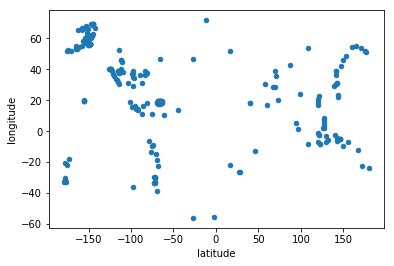

In [105]:
# Scatter plot of the lat-lon coordinates of earthquakes

df.plot(x='latitude', y='longitude', kind='scatter')

### For next time...

In the next class, you will try out another API that provides data you're interested in. You will be asked to try connecting to it using Python code, and performing some basic operations on the data.  To come prepared for next time, please explore some of the transportation-related APIs that may be valuable, and choose one that is of interest to you.

Here are a a few to get you started. 

Public Transit
https://www.programmableweb.com/news/how-smart-cities-are-using-apis-public-transport-apis/2014/05/22

Long-Distance Travel
http://www.olery.com/blog/the-best-travel-apis-discover-contribute/ 

Transportation
https://www.programmableweb.com/category/transportation/api


Start by reading the public transit page, because that provides a nice overview of the types of applications out there, and some of the issues in using them.  These lessons often apply to traffic and transportation more generally.  

Keep in mind that there are a number of different organizations that provide APIs, with different motivations and quality of what is provided.  If it is a private company, what is their business model?  What is the underlying source of the data, and what might that imply about how representative it is of the real world?  There is a ton of stuff out there.  How do we go about sorting out what is useful to us and what is now.  Spend some time exploring these and thinking about these questions.  
